In [1]:
import numpy as np
import pandas as pd

In [3]:
train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")

In [4]:
train_data.shape

(8523, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
#Check for Unique values
print(train_data['Item_Fat_Content'].unique())
print(train_data['Item_Type'].unique())
print(train_data['Outlet_Establishment_Year'].sort_values().unique())
#print(train_data['Outlet_Size'].unique())
print(train_data['Outlet_Location_Type'].unique())
print(train_data['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
[1985 1987 1997 1998 1999 2002 2004 2007 2009]
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [9]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('LF', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('reg', 'Regular')

Item_Weight                     AxesSubplot(0.125,0.125;0.133621x0.755)
Item_Visibility              AxesSubplot(0.285345,0.125;0.133621x0.755)
Item_MRP                      AxesSubplot(0.44569,0.125;0.133621x0.755)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.125;0.133621x0.755)
Item_Outlet_Sales            AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

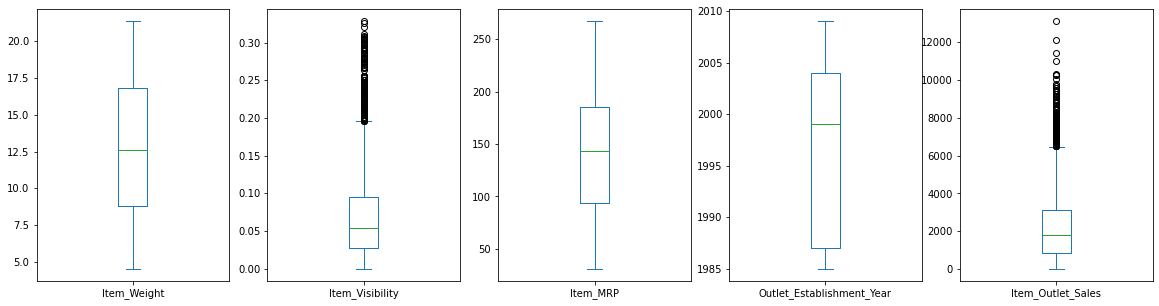

In [10]:
#Check for Outliers
train_data.plot(kind='box', subplots=True, layout=(1,5), figsize=(20,5))

In [11]:
train_data['Item_Visibility']=train_data[train_data['Item_Visibility']<0.18]['Item_Visibility']

In [12]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               228
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
print("Item Weight NULL value percentage", 1463/8523)
print("Outlet Size NULL value percentage", 2410/8523)
print("Item Visiblity NULL value percentage", 228/8523)

Item Weight NULL value percentage 0.1716531737651062
Outlet Size NULL value percentage 0.2827642848762173
Item Visiblity NULL value percentage 0.026751143963393172


In [14]:
#Replace null values
print(train_data['Item_Weight'].mode())
print(train_data['Outlet_Size'].mode())
print(train_data['Item_Visibility'].mean())

0    12.15
dtype: float64
0    Medium
dtype: object
0.06181292964400252


In [15]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(12.15)
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Medium')
train_data['Item_Visibility']=train_data['Item_Visibility'].fillna(0.06181292964400241)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

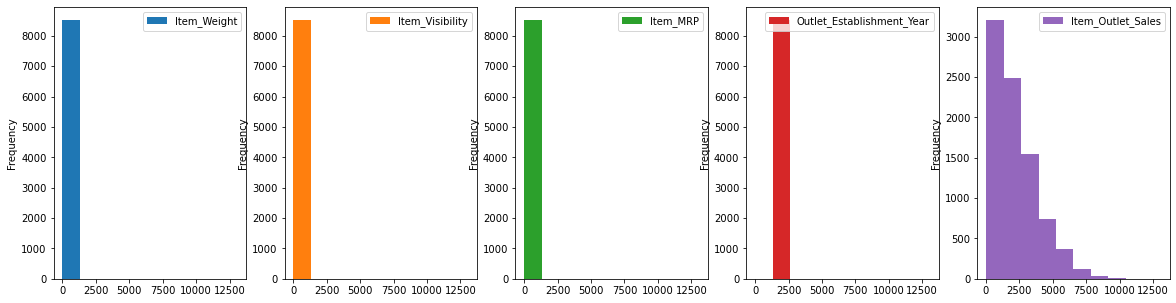

In [17]:
#Univariant Analysis
train_data.plot(kind='hist', subplots=True, layout=(1,5), figsize=(20,5))

<AxesSubplot:>

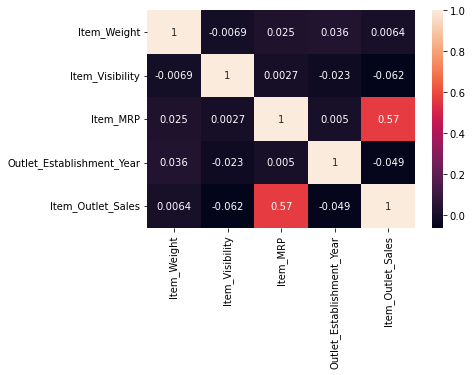

In [18]:
#Bivariant Analysis
import seaborn as sns
df=train_data.corr()
sns.heatmap(df, annot=True)

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

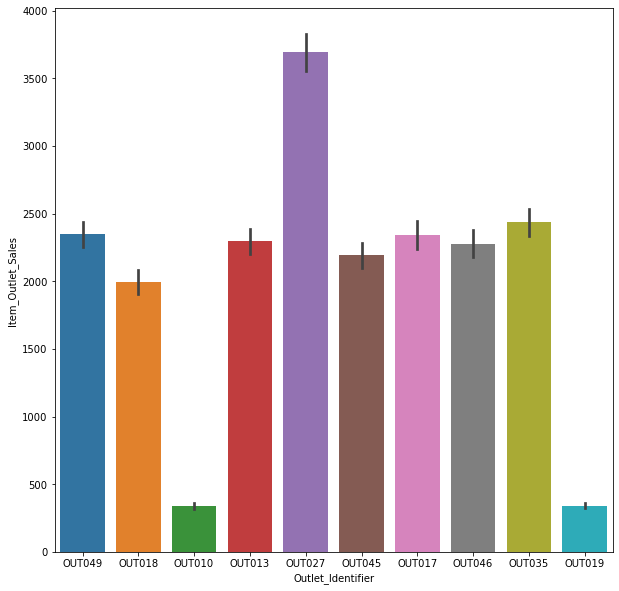

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x=train_data['Outlet_Identifier'], y=train_data['Item_Outlet_Sales'])
train_data['Outlet_Identifier'].value_counts()

In [20]:
#removing unwanted columns
train_data=train_data.drop('Item_Identifier', axis=1)

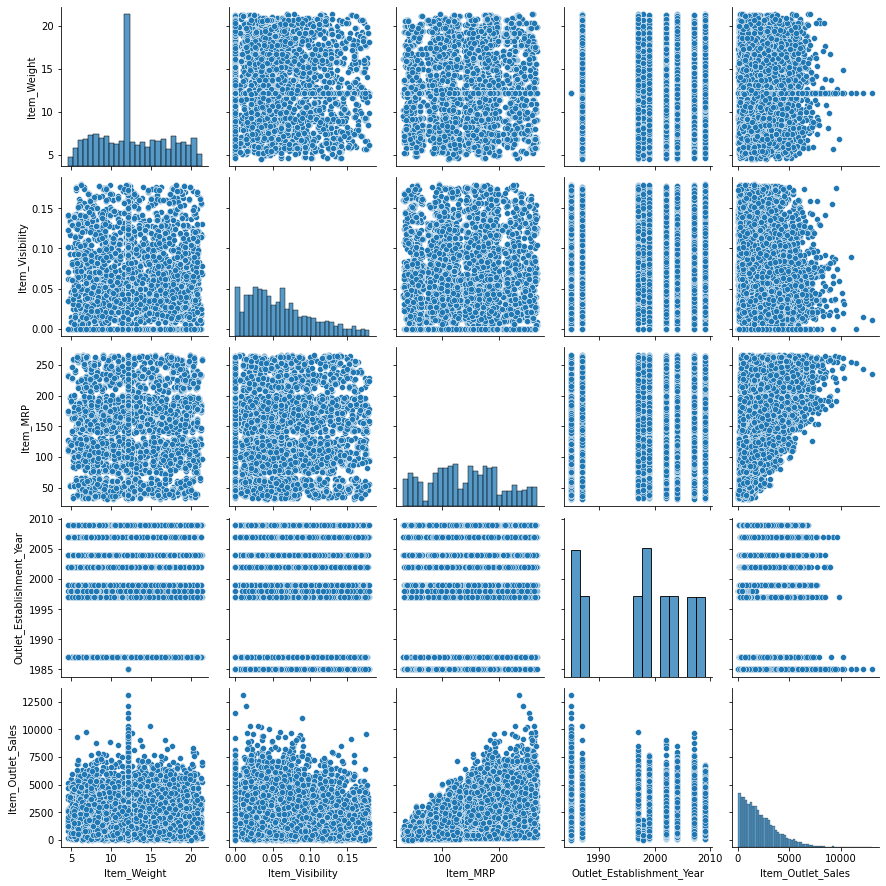

In [21]:
#Multivariant
sns.pairplot(train_data)

In [22]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_data['Item_Fat_Content']=label.fit_transform(train_data['Item_Fat_Content'])
train_data['Outlet_Size']=label.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']=label.fit_transform(train_data['Outlet_Location_Type'])

In [23]:
df=pd.get_dummies(train_data['Item_Type'])
train_data=pd.concat([train_data, df], axis=1)

df=pd.get_dummies(train_data['Outlet_Identifier'])
train_data=pd.concat([train_data, df], axis=1)

df=pd.get_dummies(train_data['Outlet_Type'])
train_data=pd.concat([train_data, df], axis=1)

In [24]:
train_data=train_data.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   int32  
 6   Outlet_Location_Type       8523 non-null   int32  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Baking Goods               8523 non-null   uint8  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

In [26]:
x_orig = train_data.drop('Item_Outlet_Sales', axis=1)
y_orig = pd.DataFrame(train_data['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])

In [27]:
y_orig.shape

(8523, 1)

In [28]:
#\linear rEgression
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score 0.544556278575946
RMSE: 1186.929042272401


In [36]:
#XGBoot
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x_orig)
y=scale.fit_transform(y_orig)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = pd.DataFrame(model.predict(x_test))

y_test = scale.inverse_transform(y_test)
y_pred = scale.inverse_transform(y_pred)

from sklearn import metrics
print("R2 score", metrics.r2_score(y_test, y_pred))

ModuleNotFoundError: No module named 'xgboost'

In [37]:
train_data=pd.read_csv('dataset/train.csv')
train_data_orig=train_data

In [38]:
test_data=pd.read_csv('dataset/train.csv')
test_data_orig=test_data

In [39]:
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('LF', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].replace('reg', 'Regular')

#train_data=train_data.drop(['Item_Weight', 'Item_Identifier', 'Outlet_Size', 'Item_Visibility'], axis=1)

train_data['Item_Visibility']=train_data[train_data['Item_Visibility']<0.18]['Item_Visibility']

train_data['Item_Weight']=train_data['Item_Weight'].fillna(12.15)
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Medium')
train_data['Item_Visibility']=train_data['Item_Visibility'].fillna(0.06181292964400241)

train_data=train_data.drop('Item_Identifier', axis=1)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train_data['Item_Fat_Content']=label.fit_transform(train_data['Item_Fat_Content'])
train_data['Outlet_Size']=label.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type']=label.fit_transform(train_data['Outlet_Location_Type'])

df=pd.get_dummies(train_data['Item_Type'])
train_data=pd.concat([train_data, df], axis=1)
df=pd.get_dummies(train_data['Outlet_Identifier'])
train_data=pd.concat([train_data, df], axis=1)
df=pd.get_dummies(train_data['Outlet_Type'])
train_data=pd.concat([train_data, df], axis=1)



In [40]:
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('LF', 'Low Fat')
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('low fat', 'Low Fat')
test_data['Item_Fat_Content']=test_data['Item_Fat_Content'].replace('reg', 'Regular')

#test_data=test_data.drop(['Item_Weight', 'Item_Identifier', 'Outlet_Size', 'Item_Visibility'], axis=1)

test_data['Item_Visibility']=test_data[test_data['Item_Visibility']<0.18]['Item_Visibility']

test_data['Item_Weight']=test_data['Item_Weight'].fillna(12.15)
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna('Medium')
test_data['Item_Visibility']=test_data['Item_Visibility'].fillna(0.06181292964400241)

test_data=test_data.drop('Item_Identifier', axis=1)

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
test_data['Item_Fat_Content']=label.fit_transform(test_data['Item_Fat_Content'])
test_data['Outlet_Size']=label.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type']=label.fit_transform(test_data['Outlet_Location_Type'])

df=pd.get_dummies(test_data['Item_Type'])
test_data=pd.concat([test_data, df], axis=1)
df=pd.get_dummies(test_data['Outlet_Identifier'])
test_data=pd.concat([test_data, df], axis=1)
df=pd.get_dummies(test_data['Outlet_Type'])
test_data=pd.concat([test_data, df], axis=1)

test_data=test_data.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], axis=1)

In [41]:
train_data['Outlet_Size'].unique()
test_data['Outlet_Size'].unique()

array([1, 0, 2])

In [43]:
a=pd.DataFrame(test_data_orig[['Item_Identifier', 'Outlet_Identifier']], columns=['Item_Identifier', 'Outlet_Identifier'])
b=pd.DataFrame(abs(y_pred), columns=['Item_Outlet_Sales'])

new=pd.concat([a,b], axis=1)

display(new)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDA15,OUT049,3158.294681
1,DRC01,OUT018,4258.934762
2,FDN15,OUT049,1316.416876
3,FDX07,OUT010,1288.255747
4,NCD19,OUT013,3438.184420
...,...,...,...
8518,FDF22,OUT013,NaN
8519,FDS36,OUT045,NaN
8520,NCJ29,OUT035,NaN
8521,FDN46,OUT018,NaN


In [44]:
new[new['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [45]:
new.to_csv('submission.csv', index=False)

In [46]:
train_data2=pd.read_csv('/kaggle/input/big-mart-sales-prediction-datasets/train.csv')
train_data2[(train_data2['Item_Identifier']=='NCR42') | (train_data2['Outlet_Identifier']=='OUT019')]

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/big-mart-sales-prediction-datasets/train.csv'